# Statistiques descriptives

### Import des packages utilisés

les packages n'étaient pas installés
``` python
!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

On utilise cartiflette pour visualiser l'ensemble des données sur une carte de France.
```python
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartogether
```


In [3]:
import cartiflette.s3

from cartiflette.download import get_vectorfile_ign

dep = get_vectorfile_ign(
  level = "DEPARTEMENT",
  source = "COG", provider="opendatarchives")
dep

http://files.opendatarchives.fr/professionnels.ign.fr/adminexpress/ADMIN-EXPRESS-COG_3-1__SHP__FRA_L93_2022-04-15.7z
Data have been previously downloaded and are still available in C:\Users\kilia\AppData\Local\Temp/COG-2022


,ID,NOM_M,NOM,INSEE_DEP,INSEE_REG,geometry
0,DEPARTEM_FXX_00000000001,AIN,Ain,01,84,"POLYGON ((838383.200 6570485.800, 838483.800 6..."
1,DEPARTEM_FXX_00000000002,AISNE,Aisne,02,32,"POLYGON ((708719.000 6956305.000, 708718.700 6..."
2,DEPARTEM_FXX_00000000003,CORSE-DU-SUD,Corse-du-Sud,2A,94,"MULTIPOLYGON (((1165315.300 6103089.200, 11653..."
3,DEPARTEM_FXX_00000000004,HAUTE-CORSE,Haute-Corse,2B,94,"MULTIPOLYGON (((1222168.900 6235253.100, 12221..."
4,DEPARTEM_FXX_00000000005,ALLIER,Allier,03,84,"POLYGON ((664478.800 6602292.500, 664503.600 6..."
...,...,...,...,...,...,...
91,DEPARTEM_FXX_00000000092,ESSONNE,Essonne,91,11,"POLYGON ((629444.100 6836670.800, 629365.600 6..."
92,DEPARTEM_FXX_00000000093,HAUTS-DE-SEINE,Hauts-de-Seine,92,11,"POLYGON ((642868.900 6869240.500, 642874.900 6..."
93,DEPARTEM_FXX_00000000094,SEINE-SAINT-DENIS,Seine-Saint-Denis,93,11,"POLYGON ((660415.900 6872923.300, 660423.700 6..."
94,DEPARTEM_FXX_00000000095,VAL-DE-MARNE,Val-de-Marne,94,11,"POLYGON ((650731.000 6857288.700, 650942.200 6..."


In [4]:
dep.dtypes

ID             object
NOM_M          object
NOM            object
INSEE_DEP      object
INSEE_REG      object
geometry     geometry
dtype: object

### Données socio-démagraphiques (INSEE)

On importe les données

In [22]:
data = pd.read_csv(filepath_or_buffer='Données élections et INSEE.csv', encoding='l5', sep=',')

C:\Users\kilia\AppData\Local\Temp\ipykernel_18328\52252013.py:1: DtypeWarning: Columns (1,1557,1558,1559) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath_or_buffer='Données élections et INSEE.csv', encoding='l5', sep=',')


In [23]:
data

,Unnamed: 0,CODGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP7589,P19_POP90P,...,RT22,RTUH22,RTLIT22,AJCS22,AJCSUH22,AJCSLIT22,Nom de l'Ã©lu en 2020,Nom de l'Ã©lu en 2014,LibellÃ© de la commune,Tentative de rÃ©Ã©lection
0,0,1001,779.0,158.508629,102.468339,131.523972,194.112147,131.050309,56.014471,5.322133,...,0.0,0.0,0.0,0.0,0.0,0.0,BOULON,BOULON,L'Abergement-ClÃ©menciat,True
1,1,1002,256.0,58.646351,29.609476,74.028483,38.684019,35.381928,17.582020,2.067723,...,0.0,0.0,0.0,0.0,0.0,0.0,ORSET,ORSET,L'Abergement-de-Varey,True
2,2,1004,14134.0,2642.167045,3076.783602,2730.398468,2391.347109,2054.139468,1044.007592,195.156716,...,1.0,16.0,16.0,0.0,0.0,0.0,FABRE,FABRE,AmbÃ©rieu-en-Bugey,True
3,3,1005,1751.0,346.859147,268.250842,362.580808,380.267677,272.181257,111.034231,9.826038,...,0.0,0.0,0.0,0.0,0.0,0.0,PERNET,PERNET,AmbÃ©rieux-en-Dombes,True
4,4,1006,112.0,12.218182,16.290909,15.272727,29.527273,27.490909,10.181818,1.018182,...,0.0,0.0,0.0,0.0,0.0,0.0,BIONDA,BIONDA,AmblÃ©on,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27174,27174,97417,5198.0,1041.708722,894.098174,933.109533,1235.711156,776.009736,294.166734,23.195943,...,0.0,0.0,0.0,0.0,0.0,0.0,RIVIERE,RIVIERE,Saint-Philippe,True
27175,27175,97421,7136.0,1711.000000,1321.000000,1289.000000,1575.000000,858.000000,354.000000,28.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FOUASSIN,FOUASSIN,Salazie,True
27176,27176,97422,79824.0,17965.710576,16081.862311,14636.246671,16582.101722,10535.209215,3678.636613,344.232891,...,0.0,0.0,0.0,0.0,0.0,0.0,THIEN-AH-KOON,THIEN AH KOON,Le Tampon,False
27177,27177,97423,7015.0,1389.693054,1286.152394,1284.135423,1708.032693,947.626169,349.944477,49.415791,...,0.0,0.0,0.0,0.0,0.0,0.0,PAUSE,PAUSE,Les Trois-Bassins,True


Création d'une colonne avec le numéro de département

In [24]:
data.dtypes

Unnamed: 0                     int64
CODGEO                        object
P19_POP                      float64
P19_POP0014                  float64
P19_POP1529                  float64
                              ...   
AJCSLIT22                    float64
Nom de l'Ã©lu en 2020         object
Nom de l'Ã©lu en 2014         object
LibellÃ© de la commune        object
Tentative de rÃ©Ã©lection     object
Length: 1915, dtype: object

On a besoin de convertir le dtype de la colonne CODGEO avant de procéder au slicing.

In [25]:
ds = data["CODGEO"].astype(str)
data["depart"] = ds.str.slice(stop=-3)
print(data["depart"])

0         1
1         1
2         1
3         1
4         1
         ..
27174    97
27175    97
27176    97
27177    97
27178    97
Name: depart, Length: 27179, dtype: object


On rajoute un '0' devant les départements n'ayant qu'un seul chiffre

In [26]:
for x in range (1,10):
    data["depart"][data["depart"]== str(x)] = '0' + str(x)
data["depart"]

C:\Users\kilia\AppData\Local\Temp\ipykernel_18328\3526128663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["depart"][data["depart"]== str(x)] = '0' + str(x)


0        01
1        01
2        01
3        01
4        01
         ..
27174    97
27175    97
27176    97
27177    97
27178    97
Name: depart, Length: 27179, dtype: object

On rajoute une colonne binaire qui vaut True si  la commune a plus de 1000 habitants et False sinon

In [27]:
data["1000_hab_19"] = np.where(data["P19_POP"] >= 1000, True, False)
data["1000_hab_13"] = np.where(data["P13_POP"] >= 1000, True, False)                      

,Unnamed: 0,CODGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP7589,P19_POP90P,...,AJCS22,AJCSUH22,AJCSLIT22,Nom de l'Ã©lu en 2020,Nom de l'Ã©lu en 2014,LibellÃ© de la commune,Tentative de rÃ©Ã©lection,depart,1000_hab_19,1000_hab_13
0,0,1001,779.0,158.508629,102.468339,131.523972,194.112147,131.050309,56.014471,5.322133,...,0.0,0.0,0.0,BOULON,BOULON,L'Abergement-ClÃ©menciat,True,01,False,False
1,1,1002,256.0,58.646351,29.609476,74.028483,38.684019,35.381928,17.582020,2.067723,...,0.0,0.0,0.0,ORSET,ORSET,L'Abergement-de-Varey,True,01,False,False
2,2,1004,14134.0,2642.167045,3076.783602,2730.398468,2391.347109,2054.139468,1044.007592,195.156716,...,0.0,0.0,0.0,FABRE,FABRE,AmbÃ©rieu-en-Bugey,True,01,True,True
3,3,1005,1751.0,346.859147,268.250842,362.580808,380.267677,272.181257,111.034231,9.826038,...,0.0,0.0,0.0,PERNET,PERNET,AmbÃ©rieux-en-Dombes,True,01,True,True
4,4,1006,112.0,12.218182,16.290909,15.272727,29.527273,27.490909,10.181818,1.018182,...,0.0,0.0,0.0,BIONDA,BIONDA,AmblÃ©on,True,01,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27174,27174,97417,5198.0,1041.708722,894.098174,933.109533,1235.711156,776.009736,294.166734,23.195943,...,0.0,0.0,0.0,RIVIERE,RIVIERE,Saint-Philippe,True,97,True,True
27175,27175,97421,7136.0,1711.000000,1321.000000,1289.000000,1575.000000,858.000000,354.000000,28.000000,...,0.0,0.0,0.0,FOUASSIN,FOUASSIN,Salazie,True,97,True,True
27176,27176,97422,79824.0,17965.710576,16081.862311,14636.246671,16582.101722,10535.209215,3678.636613,344.232891,...,0.0,0.0,0.0,THIEN-AH-KOON,THIEN AH KOON,Le Tampon,False,97,True,True
27177,27177,97423,7015.0,1389.693054,1286.152394,1284.135423,1708.032693,947.626169,349.944477,49.415791,...,0.0,0.0,0.0,PAUSE,PAUSE,Les Trois-Bassins,True,97,True,True


### Premier aperçu des données

#### Nombre de communes par département

Nombre de communes étudiées par département en 2019

In [16]:
departements = list(dep["INSEE_DEP"])
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][data["depart"]==x].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

,NOM,NB_COMMUNES
0,Ain,402
1,Aisne,817
2,Corse-du-Sud,117
3,Haute-Corse,221
4,Allier,359
...,...,...
91,Essonne,143
92,Hauts-de-Seine,24
93,Seine-Saint-Denis,33
94,Val-de-Marne,40


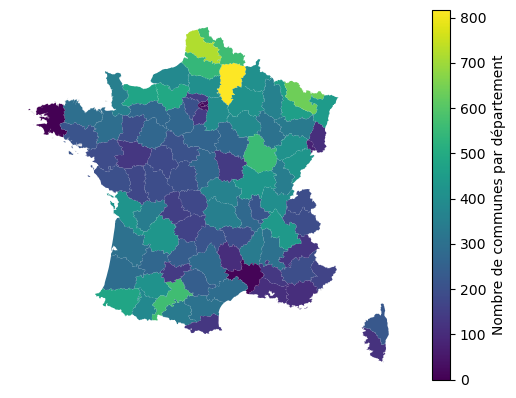

In [17]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes par département"})
ax.set_axis_off()

Nombre de communes de moins de 1000 habitants étudiées par département en 2019

In [28]:
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][(data["depart"]==x) & (data["1000_hab_19"] == False) ].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

,NOM,NB_COMMUNES
0,Ain,213
1,Aisne,711
2,Corse-du-Sud,92
3,Haute-Corse,193
4,Allier,282
...,...,...
91,Essonne,52
92,Hauts-de-Seine,0
93,Seine-Saint-Denis,0
94,Val-de-Marne,0


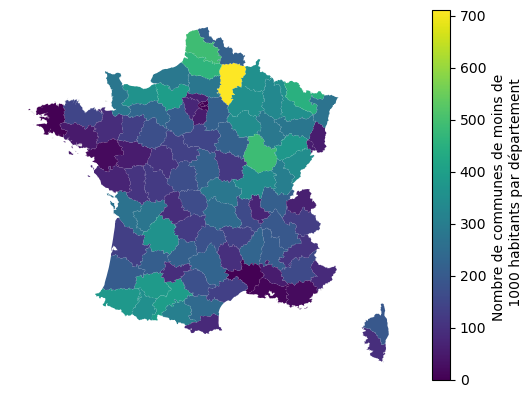

In [31]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes de moins de \n 1000 habitants par département"})
ax.set_axis_off()

Nombre de communes de plus de 1000 habitants étudiées par département en 2019

In [33]:
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][(data["depart"]==x) & (data["1000_hab_19"] == True) ].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

,NOM,NB_COMMUNES
0,Ain,189
1,Aisne,106
2,Corse-du-Sud,25
3,Haute-Corse,28
4,Allier,77
...,...,...
91,Essonne,91
92,Hauts-de-Seine,24
93,Seine-Saint-Denis,33
94,Val-de-Marne,40


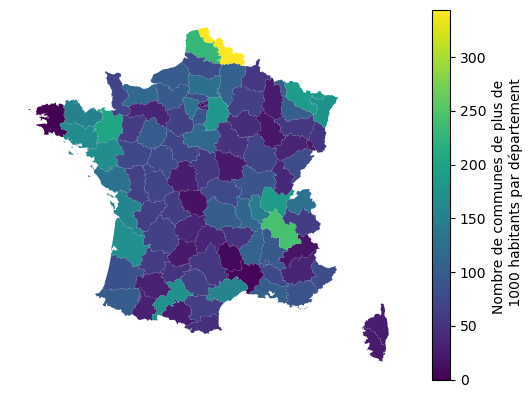

In [34]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes de plus de \n 1000 habitants par département"})
ax.set_axis_off()